# Visualisation of covid19 epidemyin Italy

Import required libraries

In [13]:
import os
import requests
import json
import matplotlib.pyplot as plt

Setting up matplotlib 

In [16]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

Import the data made available by the Protezione Civile in the JSON format 

In [7]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json'
data = requests.get(url)
json_data = json.loads(data.content)

Sample of data point format

In [8]:
json_data[0]

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'ricoverati_con_sintomi': 101,
 'terapia_intensiva': 26,
 'totale_ospedalizzati': 127,
 'isolamento_domiciliare': 94,
 'totale_positivi': 221,
 'variazione_totale_positivi': 0,
 'nuovi_positivi': 221,
 'dimessi_guariti': 1,
 'deceduti': 7,
 'totale_casi': 229,
 'tamponi': 4324,
 'casi_testati': None,
 'note_it': '',
 'note_en': ''}

In [9]:
json_data[0].keys()

dict_keys(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it', 'note_en'])

**Convert data points to list to prepare data for plotting** 

In [10]:
dates = [el['data'] for el in json_data]
isolation = [el['isolamento_domiciliare'] for el in json_data]
tot_pos_variation = [el['variazione_totale_positivi'] for el in json_data]
tot_hospitalised = [el['totale_ospedalizzati'] for el in json_data]
intensive_care = [el['terapia_intensiva'] for el in json_data]
hospitalised = [el['ricoverati_con_sintomi'] for el in json_data]
tot_cases = [el['totale_casi'] for el in json_data]

#print(len(dates))

Plot graph

In [54]:
clean_dates = []
for el in dates:
    d = el.split(':')[0].split('-')[1:3]
    day = d[1][0:2]+'-'+d[0]
    clean_dates.append(day)
clean_dates[0]

'24-02'

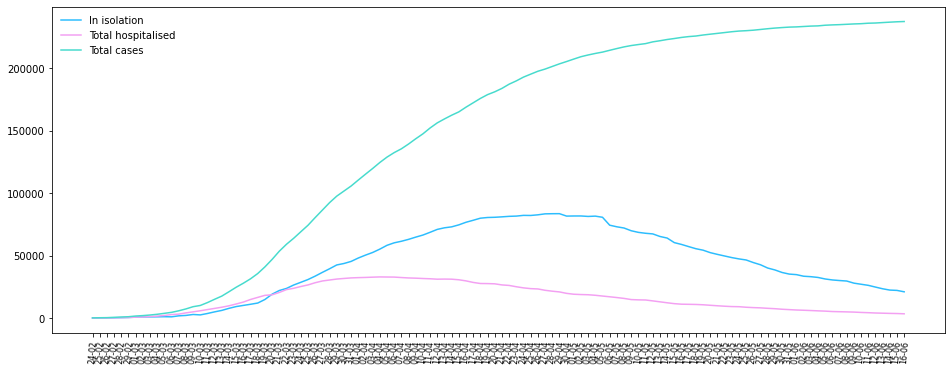

In [62]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(dates,isolation, label='In isolation')
plt.plot(dates,tot_hospitalised, label='Total hospitalised')
plt.plot(dates,tot_cases, label='Total cases')
ax.set_xticklabels(clean_dates, fontsize=8)
plt.xticks(rotation=85)
plt.legend()
plt.legend(frameon=False)
plt.show()

In [63]:
fig.savefig('where.png')

In [38]:
dates[0:4]

['2020-02-24T18:00:00',
 '2020-02-25T18:00:00',
 '2020-02-26T18:00:00',
 '2020-02-27T18:00:00']